In [0]:
import numpy as np

### Generate Data
Create a function that randomly gives either +1 or -1 as input

In [0]:
def create_u():
  """
  Inputs:
    None
  Outputs:
    u: +1 or -1 randomly generated
  """
  # YOUR CODE HERE
  u=np.random.random()
  if(u<=0.5):
      u=-1
  elif(u>0.5):
      u=1
    
  return u

#### Desired data
$y(t+1) = w_0y(t) + w_1y(t-1) + w_2u(t) $

In [0]:
"""Test for create_u"""
u = create_u()
assert u==1 or u== -1


In [0]:
def generate_data(timesteps, w0, w1, w2):
  """
  Inputs:
    timesteps: int, number of timesteps of data
  Outputs:
    u: numpy array with each element +1 or -1 of shape (timesteps, )
    yd: numpy array with each element computed using above equation of shape (timesteps, )
  """
  # YOUR CODE HERE
  y=0
  y1=0
  y2=0
  u=[]
  yd=[]
  for i in range(0,timesteps):
    u+=[create_u()]
    y+=w2*u[i]
#     try:
#       y+=w0*yd[i-1]
#     except:
#       y+=0
#     try:
#       y+=w1*yd[i-2]
#     except:
#       y+=0
    if(i>0):
      y+=w0*yd[i-1]
    if(i>1):
      y+=w1*yd[i-2]
    yd+=[y]
    y=0
  u=np.array(u)
  yd=np.array(yd)
  return u, yd


In [5]:
u=[-1,1,-1,-1,-1]
yd=[]
y=0
for i in range(len(u)):
  y+=0.5*u[i]
  if(i>0):
      y+=1.1*yd[i-1]
  if(i>1):
      y+=-0.3*yd[i-2]
  yd+=[y]
  y=0
print(yd)

[-0.5, -0.050000000000000044, -0.405, -0.9305, -1.4020500000000002]


In [0]:
### Generate u, yd
u, yd = generate_data(10000, 1.1, -0.3, 0.5)

In [7]:
print(u[:5])

[ 1  1 -1  1 -1]


In [8]:
print(yd[:5])

[0.5     1.05    0.505   0.7405  0.16305]


### Write expression for $y(t+1)$

In [0]:
def get_y_tplus1(w, yt, ytminus1, u):
  """
  Inputs:
    w: numpy array of weights of shape (3, )
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
  Outputs:
    y_tplus1: float, y at t+1
  """
  # YOUR CODE HERE
  return w[2]*u+w[1]*ytminus1+w[0]*yt

In [10]:
get_y_tplus1([1.1,-0.3,0.5],-0.05,-0.5,-1)

-0.40499999999999997

### Forward propagation of weights
$$
\frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + y(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_1} = w_0\frac{\partial y(t)}{\partial w_1} + y(t-1) + w_1\frac{\partial y(t-1)}{\partial w_1} \\
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_2} = w_0\frac{\partial y(t)}{\partial w_2} +  w_1\frac{\partial y(t-1)}{\partial w_2} + u(t) 
$$
<br><br>
pwj1 is a matrix $\frac{\partial y(t)}{\partial w} =
[\frac{\partial y(t)}{\partial w_0}, \frac{\partial y(t)}{\partial w_1}, \frac{\partial y(t)}{\partial w_2}]$
<br><br>
pwj0 is a matrix $\frac{\partial y(t-1)}{\partial w} =
[\frac{\partial y(t-1)}{\partial w_0}, \frac{\partial y(t-1)}{\partial w_1}, \frac{\partial y(t-1)}{\partial w_2}]$
<br><br>
pwj2 is a matrix $\frac{\partial y(t+1)}{\partial w} =
[\frac{\partial y(t+1)}{\partial w_0}, \frac{\partial y(t+1)}{\partial w_1}, \frac{\partial y(t+1)}{\partial w_2}]$

In [0]:
def forward_prop_weights(w, yt, ytminus1, u, pwj1, pwj0):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
    pwj1: numpy array of shape (3, ) as described above
    pwj0: numpy array of shape (3, ) as described above
  Outputs:
    pwj2: numpy array of shape (3, ) as described above
  """  
  # YOUR CODE HERE
  pwj2=[]
  pwj2+=[w[0]*pwj1[0]+yt+w[1]*pwj0[0]]
  pwj2+=[w[0]*pwj1[1]+ytminus1+w[1]*pwj0[1]]
  pwj2+=[w[0]*pwj1[2]+w[1]*pwj0[2]+u]
  pwj2=np.array(pwj2)
#   print(pwj2)
  return pwj2

### Weight update - Gradient descent
$E = \frac{1}{2}(y_d - y)^2$ <br>
$w_{new} = w_{old} - \eta\frac{\partial E}{\partial w} = w_{old} - \eta(y_d - y)\cdot pwj2$ 

In [0]:
def update_w(w, eta, yd, y, pwj2):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    eta: float, learning rate
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
    pwj2: numpy array of shape(3,) obtained from forward_prop_weights
  Outputs:
    w_updated: numpy array of shape(3, ), updated weights
  """
  # YOUR CODE HERE
#   print(w)
  for i in range(3):
    w[i]+=eta*(yd-y)*pwj2[i]
  return w

### Cost function (error)
$E = \frac{1}{2}(y_d - y)^2$ <br>


In [0]:
def err(yd, y):
  """
  Inputs:
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
  Outputs:
    E: scalar(float), error as described above 
  """
  # YOUR CODE HERE
  return 0.5*(yd-y)**2

### Apply RTRL

In [0]:
def RTRL(yd,u, eta, timesteps):
  """
  Inputs:
    yd: numpy array of shape(timesteps,) 
    eta: scalar(float), learning rate
    timesteps: int, number of timesteps
  Outputs:
    west: numpy array of shape(timesteps,3), keeps track of all the updated weights over time
    error: numpy array of shape(timesteps,), keeps track of error (as obtained from function err()) over time
  """
  # YOUR CODE HERE
  west=np.zeros((timesteps,3))
  pwj2=np.zeros((timesteps,3))
  
  error=[]
  y=[]
  for i in range(timesteps):
    if(i==0):
      ytplus1=get_y_tplus1(west[i],0,0,u[i])
      pwj2[i]=forward_prop_weights(west[i],0,0,u[i],np.array([0,0,0]),np.array([0,0,0]))
    if(i==1):
      ytplus1=get_y_tplus1(west[i],y[i-1],0,u[i])
      pwj2[i]=forward_prop_weights(west[i],y[i-1],0,u[i],pwj2[i-1],np.array([0,0,0]))
    if(i>1):
      ytplus1=get_y_tplus1(west[i],y[i-1],y[i-2],u[i])
      pwj2[i]=forward_prop_weights(west[i],y[i-1],y[i-2],u[i],pwj2[i-1],pwj2[i-2])
    y+=[ytplus1]
    if(not(i==timesteps-1)):
      west[i+1]=update_w(west[i],eta,yd[i],y[i],pwj2[i])
    error+=[err(yd[i],y[i])]
  return west, np.array(error)
   

In [0]:
def plot_w(west):
  plt.plot(west[:,0])
  plt.show()
  plt.plot(west[:,1])
  plt.show()
  plt.plot(west[:,2])
  plt.show()

In [0]:
def plot_err(error):
  plt.plot(error)
  plt.show()

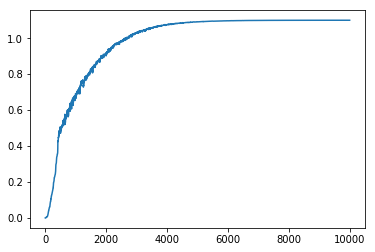

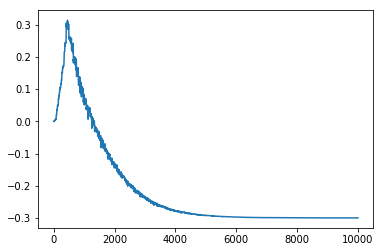

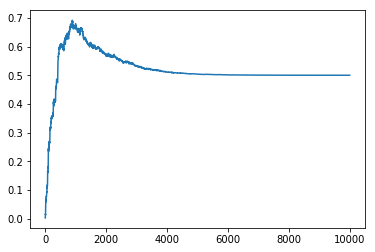

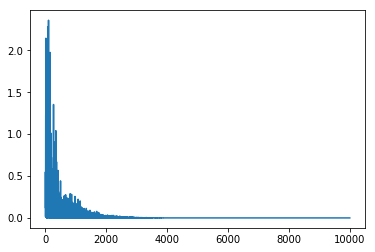

In [17]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.005
iterations = 10000

west, error = RTRL(yd, u,eta, iterations)

plot_w(west)
plot_err(error)